In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
df = pd.read_csv("../cleaned_data/upsampled_final_df.csv",index_col=0)


In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X = df.drop('Credit_Score', axis = 1)
y = df ['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [16]:
model = SVC(kernel='rbf', gamma='scale')
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

In [17]:
report = classification_report(y_test, y_pred)
print(report )

              precision    recall  f1-score   support

           0       0.75      0.85      0.80      8384
           1       0.78      0.78      0.78      8426
           2       0.72      0.62      0.66      8275

    accuracy                           0.75     25085
   macro avg       0.75      0.75      0.75     25085
weighted avg       0.75      0.75      0.75     25085



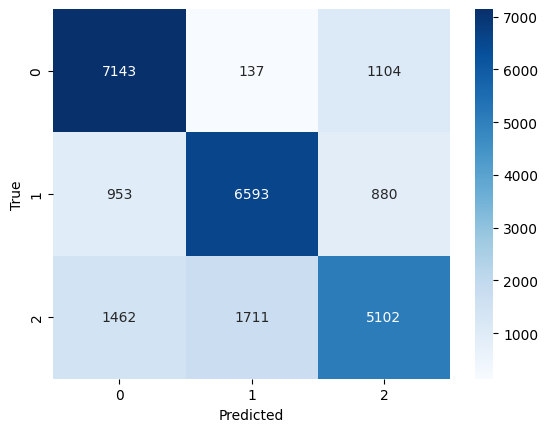

In [18]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()